# Examples of multi-panel plotting using gridplot.

In [1]:
import numpy as np
from edge_pydb import EdgeTable
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from edge_pydb.plotting import gridplot

In [2]:
sspcols  = ['Name','ix','iy','sigstar_sm','fe_medflx_sm']
fluxcols = ['Name','ix','iy','flux_[OIII]5007_sm','flux_Hbeta_sm','flux_Halpha_sm',
            'flux_[NII]6583_sm','EW_Halpha_sm','flux_sigsfr0_sm','e_flux_sigsfr0_sm',
            'flux_sigsfr_corr_sm','flux_sigsfr_adopt_sm','BPT_sm','ZOH_sm']

fluxtab = EdgeTable('edge.pipe3d.hdf5', path='flux_elines_sm', cols=fluxcols)
ssptab = EdgeTable('edge.pipe3d.hdf5', path='SSP_sm', cols=sspcols)
print('Working on full EDGE database')

# consolidate the tables and calculate sSFR
fluxtab.join(ssptab, keys=['Name', 'ix', 'iy'])
fluxtab['specSFR'] = fluxtab['flux_sigsfr0_sm'].quantity/fluxtab['sigstar_sm'].quantity
# Halpha EW image values are negative
fluxtab['EW_Halpha_sm'] = -fluxtab['EW_Halpha_sm']
print(fluxtab.colnames)

Working on full EDGE database
['Name', 'ix', 'iy', 'flux_[OIII]5007_sm', 'flux_Hbeta_sm', 'flux_Halpha_sm', 'flux_[NII]6583_sm', 'EW_Halpha_sm', 'flux_sigsfr0_sm', 'e_flux_sigsfr0_sm', 'flux_sigsfr_corr_sm', 'flux_sigsfr_adopt_sm', 'BPT_sm', 'ZOH_sm', 'sigstar_sm', 'fe_medflx_sm', 'specSFR']


In [3]:
gallist = list(np.unique(fluxtab['Name']))
print(gallist)

['ARP220', 'IC0480', 'IC0540', 'IC0944', 'IC1151', 'IC1199', 'IC1683', 'IC2247', 'IC2487', 'IC4566', 'IC5376', 'NGC0444', 'NGC0447', 'NGC0477', 'NGC0496', 'NGC0523', 'NGC0528', 'NGC0551', 'NGC1167', 'NGC2253', 'NGC2347', 'NGC2410', 'NGC2480', 'NGC2487', 'NGC2623', 'NGC2639', 'NGC2730', 'NGC2880', 'NGC2906', 'NGC2916', 'NGC2918', 'NGC3303', 'NGC3381', 'NGC3687', 'NGC3811', 'NGC3815', 'NGC3994', 'NGC4047', 'NGC4149', 'NGC4185', 'NGC4210', 'NGC4211NED02', 'NGC4470', 'NGC4644', 'NGC4676A', 'NGC4711', 'NGC4961', 'NGC5000', 'NGC5016', 'NGC5056', 'NGC5205', 'NGC5218', 'NGC5394', 'NGC5406', 'NGC5480', 'NGC5485', 'NGC5520', 'NGC5614', 'NGC5633', 'NGC5657', 'NGC5682', 'NGC5732', 'NGC5784', 'NGC5876', 'NGC5908', 'NGC5930', 'NGC5934', 'NGC5947', 'NGC5953', 'NGC5980', 'NGC6004', 'NGC6021', 'NGC6027', 'NGC6060', 'NGC6063', 'NGC6081', 'NGC6125', 'NGC6146', 'NGC6155', 'NGC6168', 'NGC6186', 'NGC6301', 'NGC6310', 'NGC6314', 'NGC6361', 'NGC6394', 'NGC6478', 'NGC7738', 'NGC7819', 'UGC00809', 'UGC03253', '

## Example of adjusting grid size.  Note that a larger font size selected.

Plotting column flux_[NII]6583_sm for 2 galaxies
Plotting NGC4047 to NGC5614
NGC4047 Default x limits used: [22, 109]
NGC4047 Default y limits used: [24.0, 111.0]


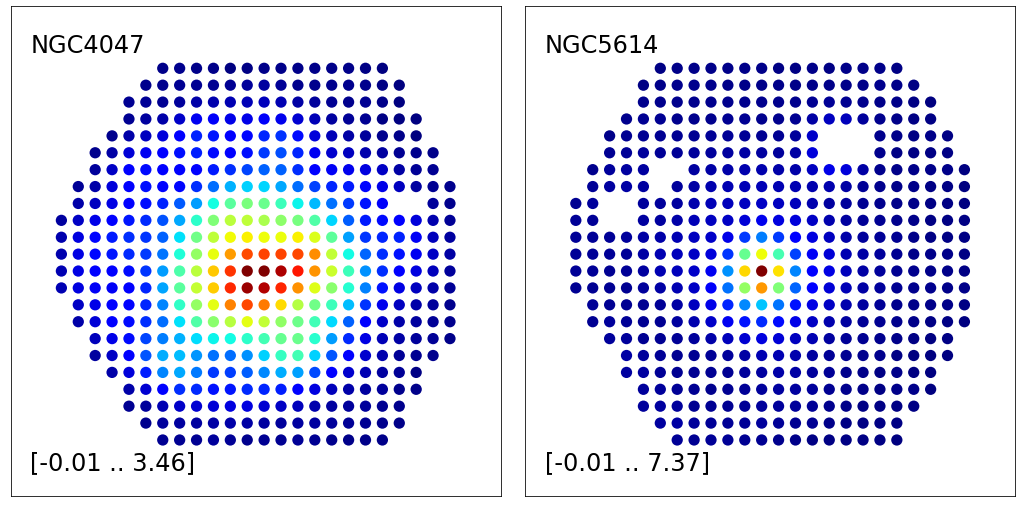

In [4]:
plt.rcParams.update({'font.size': 24})
gridplot(edgetab=fluxtab, gallist=['NGC4047', 'NGC5614'], columnlist=['flux_[NII]6583_sm'],
         plotstyle='dot', pad=9, vshow=True, nx=2, ny=1)

## Examples of plotting multiple columns for one galaxy.

Plotting 14 columns for galaxy NGC4047
Plotting flux_[OIII]5007_sm to specSFR
flux_[OIII]5007_sm Default x limits used: [20, 111]
flux_[OIII]5007_sm Default y limits used: [22.0, 113.0]


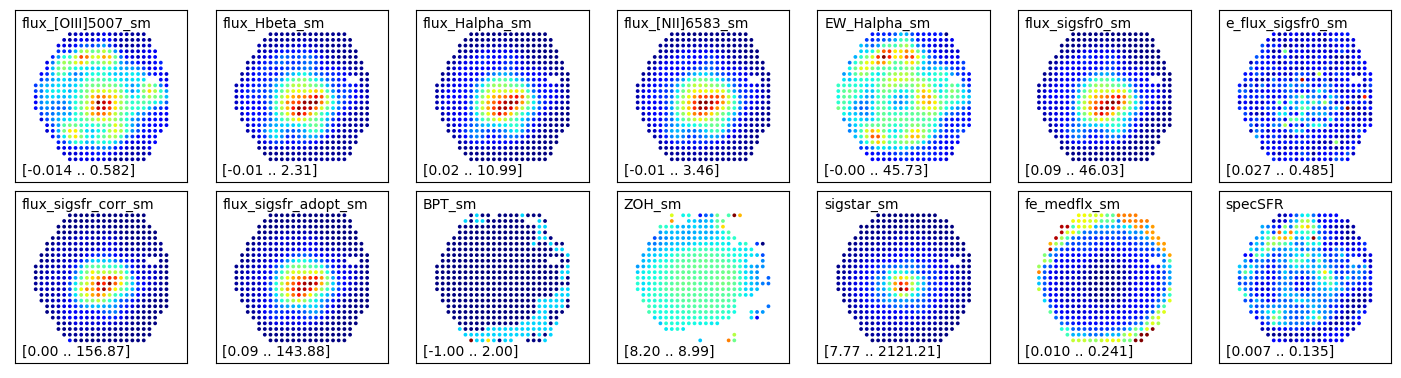

In [5]:
plt.rcdefaults()
gridplot(edgetab=fluxtab, gallist='NGC4047', plotstyle='dot', pad=11, vshow=True)

Plotting 14 columns for galaxy NGC4047
Plotting flux_[OIII]5007_sm to specSFR
flux_[OIII]5007_sm Default x limits used: [5, 38]
flux_[OIII]5007_sm Default y limits used: [6.0, 39.0]


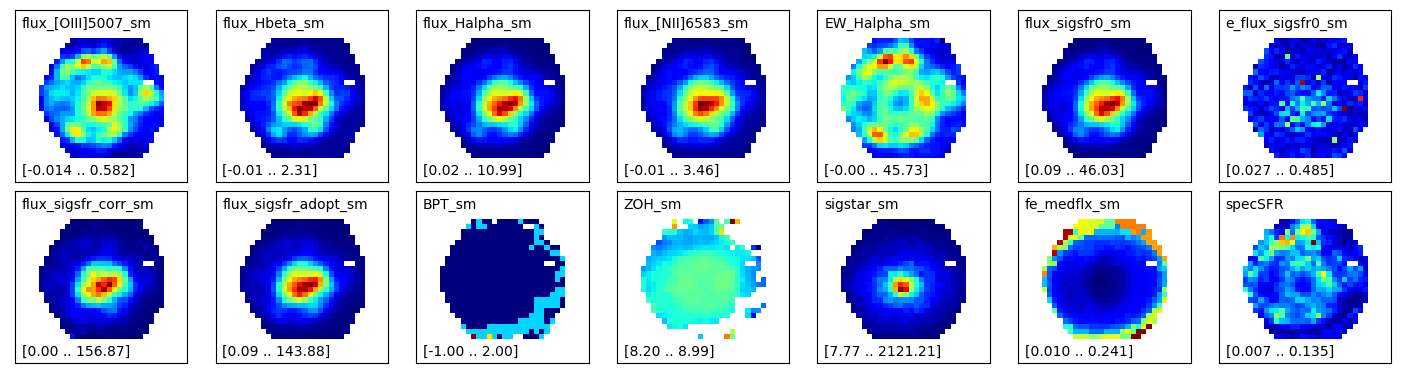

In [6]:
gridplot(edgetab=fluxtab, gallist='NGC4047', plotstyle='image', vshow=True)

## SFR map without extinction correction.  Color scale set per galaxy.

Plotting column flux_sigsfr0_sm for 125 galaxies
Plotting ARP220 to NGC4211NED02
ARP220 Default x limits used: [4, 38]
ARP220 Default y limits used: [4.0, 38.0]


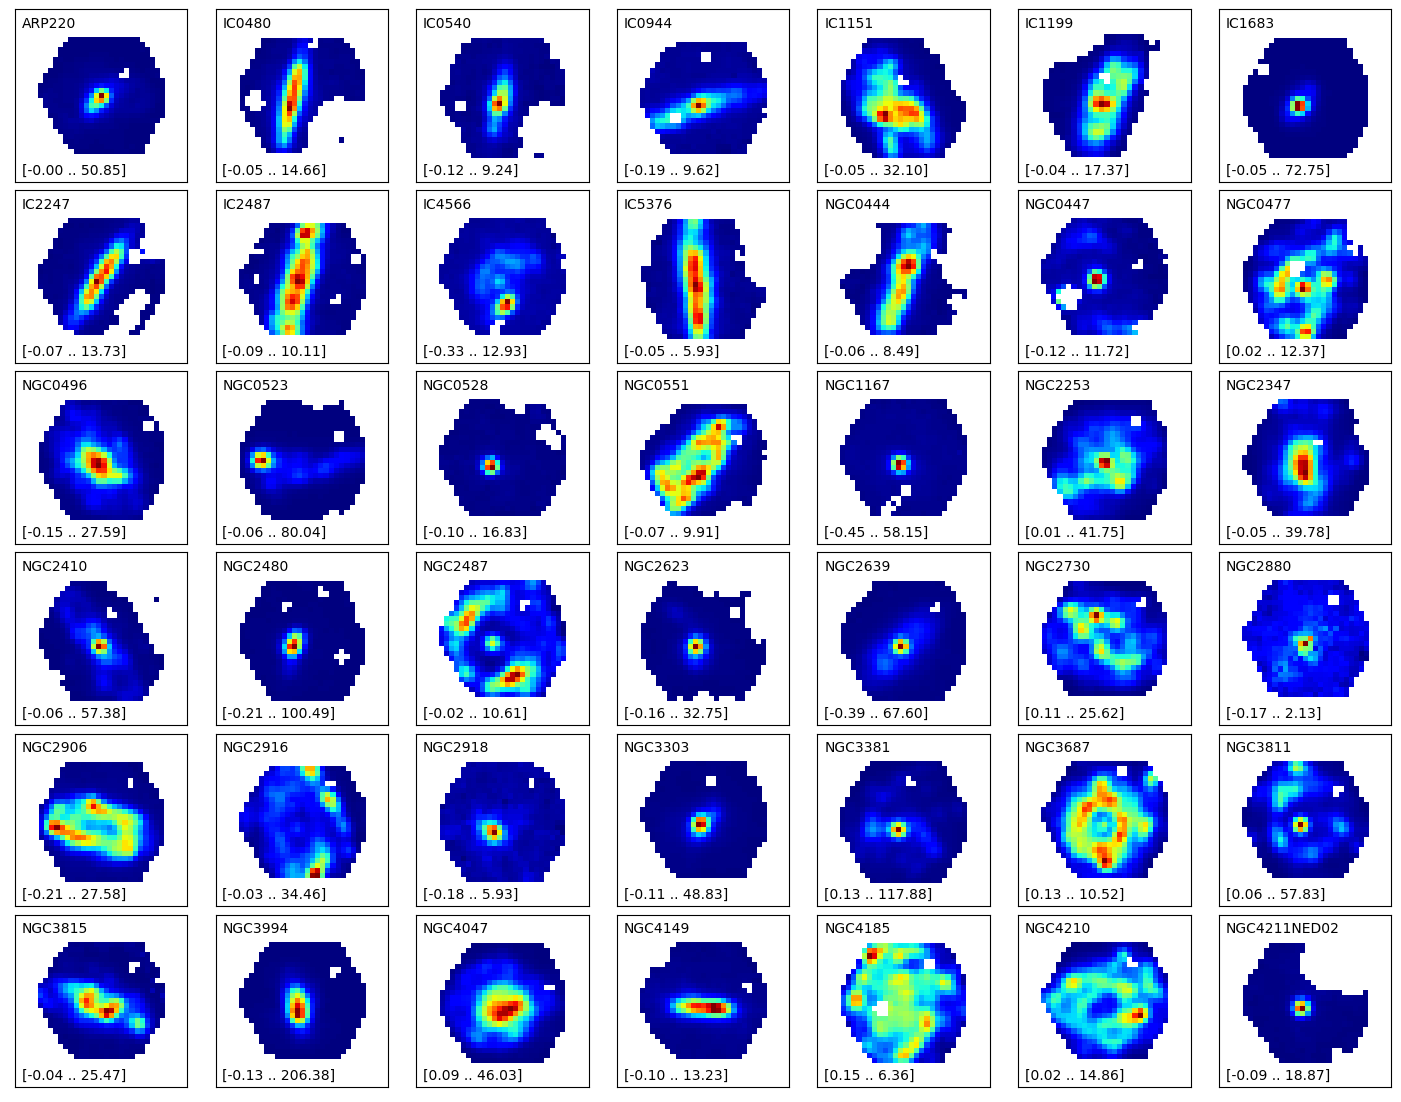

Plotting NGC4470 to NGC6314
NGC4470 Default x limits used: [7, 40]
NGC4470 Default y limits used: [5.0, 38.0]


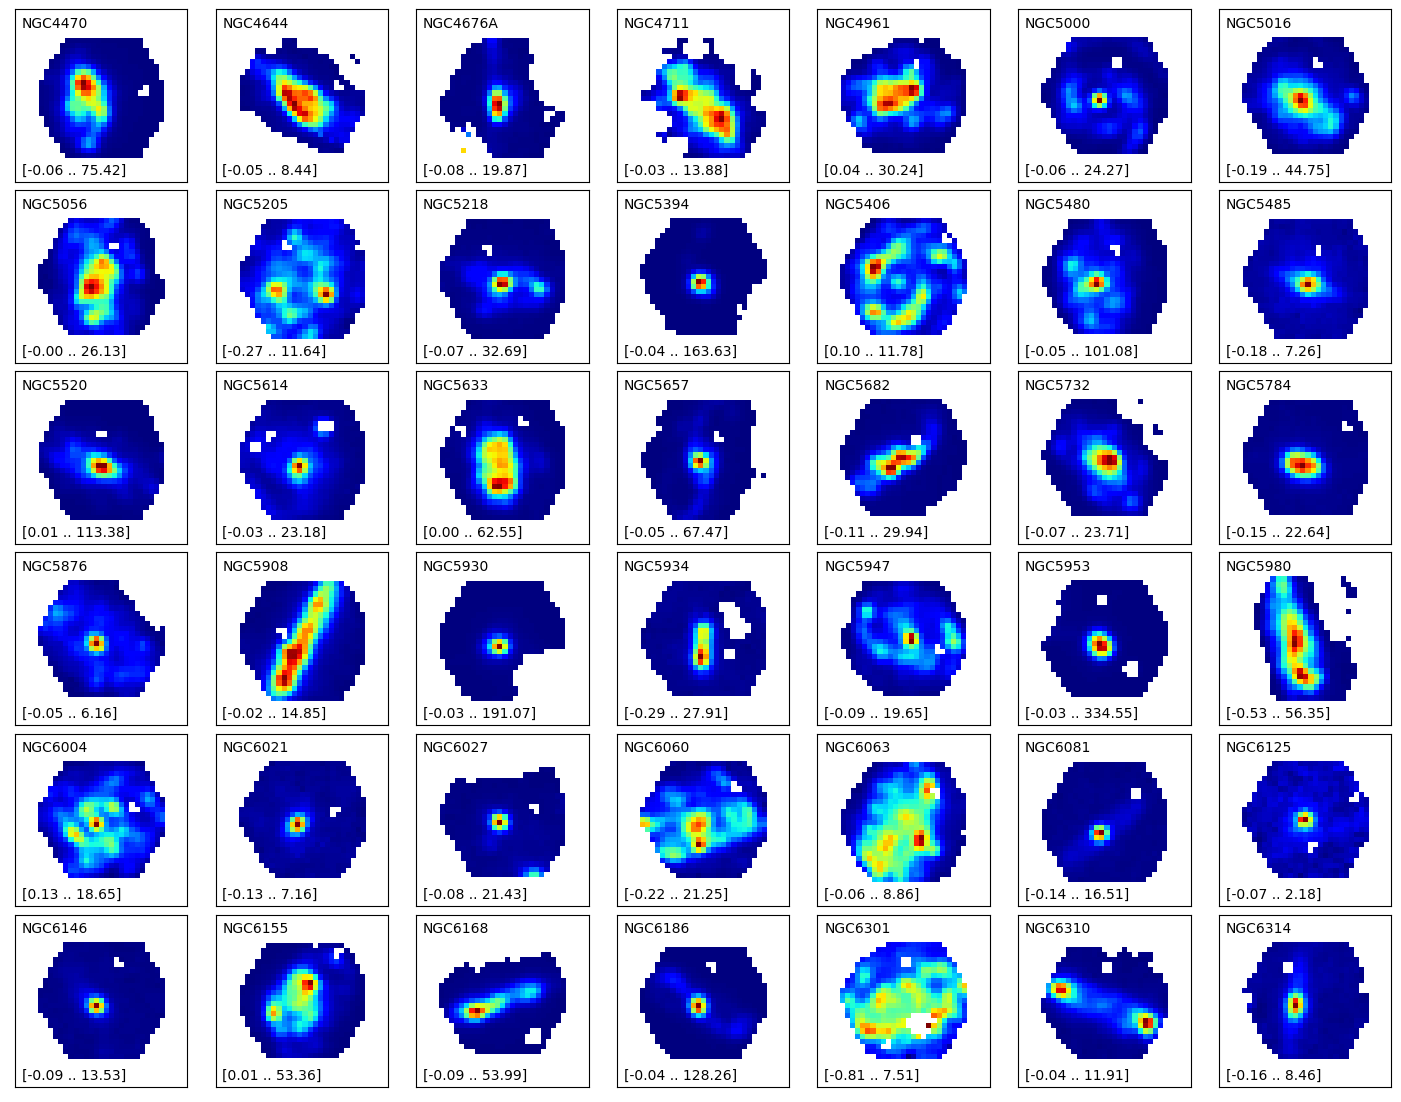

Plotting NGC6361 to UGC10710
NGC6361 Default x limits used: [5, 39]
NGC6361 Default y limits used: [5.0, 39.0]


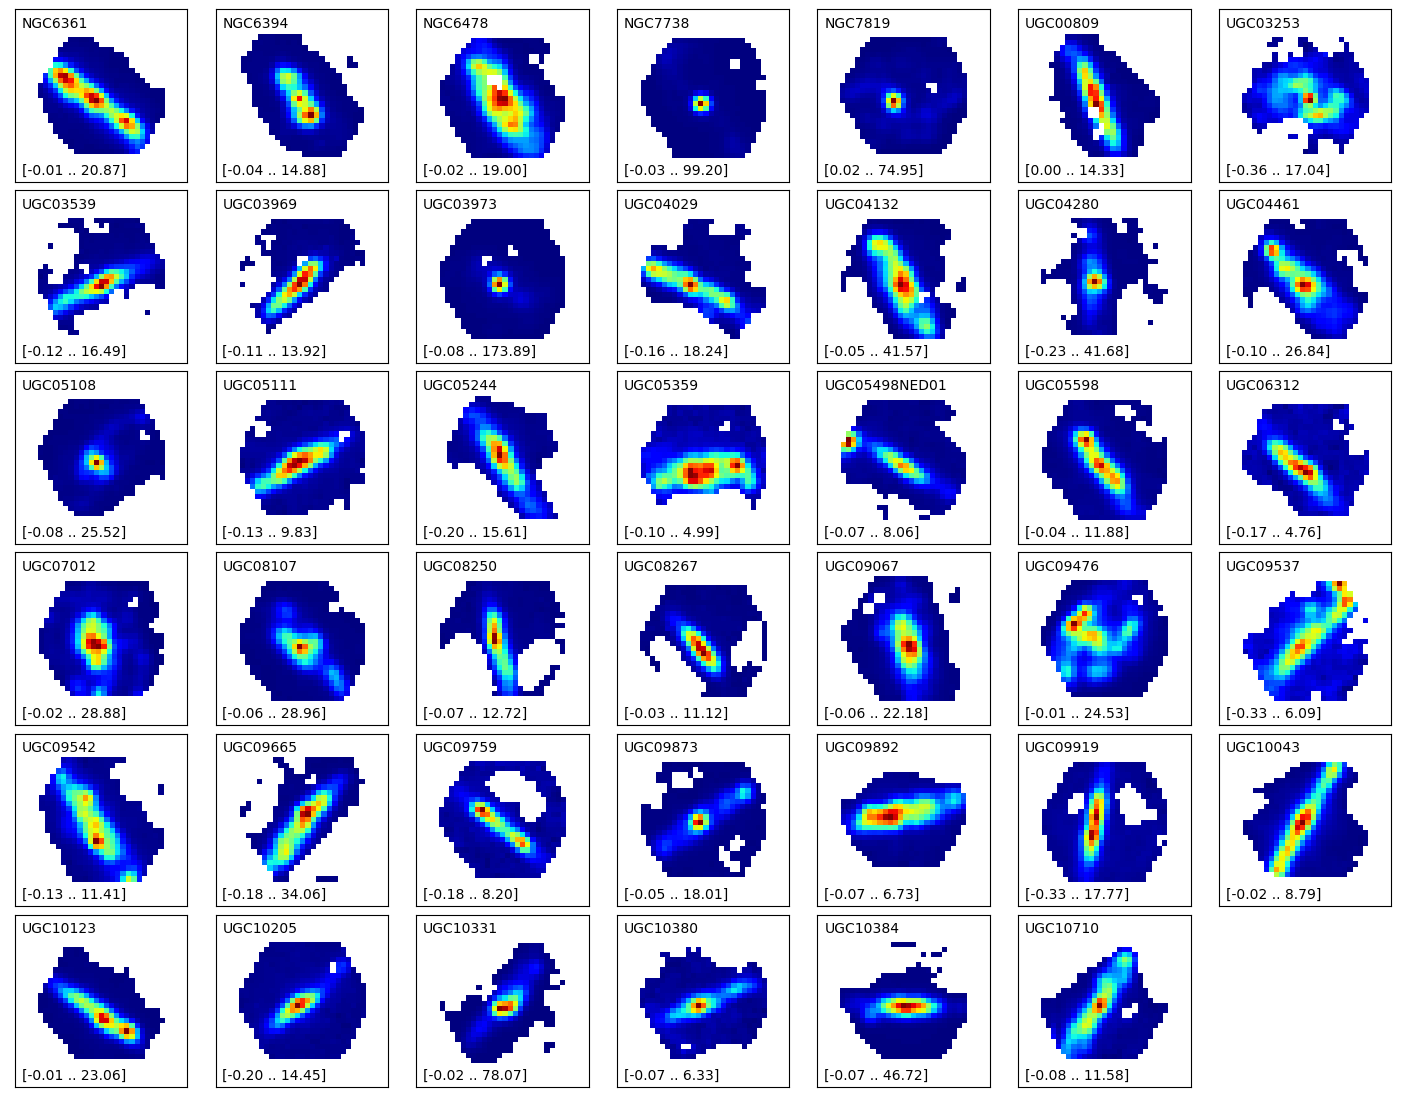

In [7]:
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='flux_sigsfr0_sm', plotstyle='image', vshow=True)

## SFR map without extinction correction.  Color scale and plot limits fixed for all galaxies.

Plotting column flux_sigsfr0_sm for 125 galaxies
Plotting ARP220 to NGC4211NED02


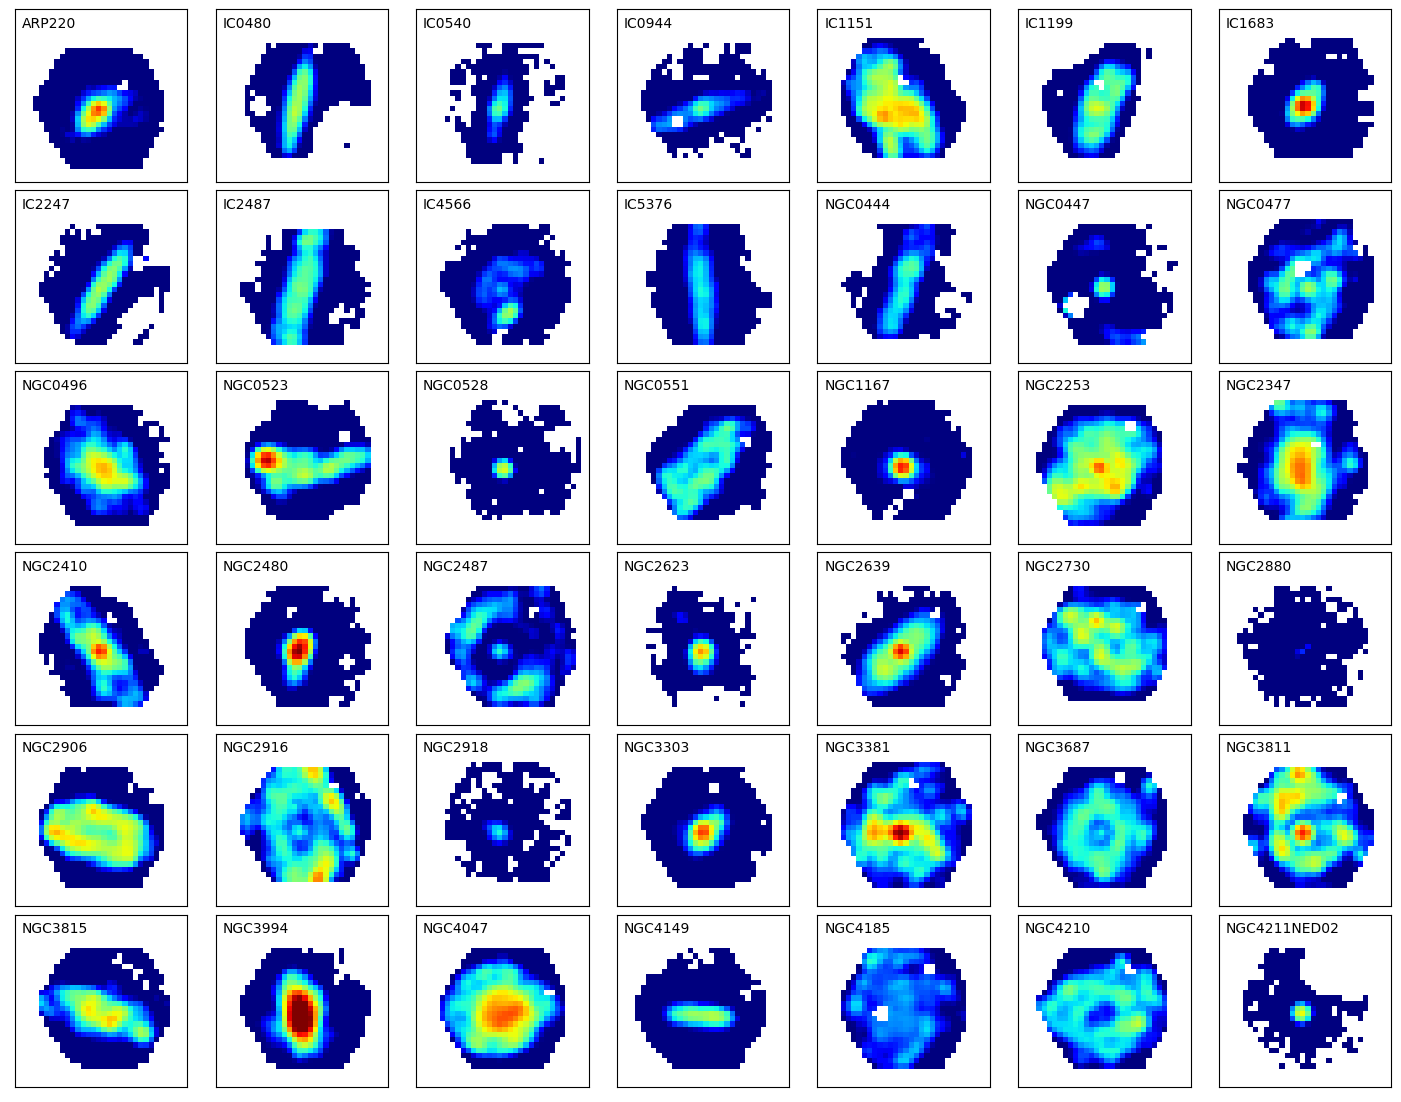

Plotting NGC4470 to NGC6314


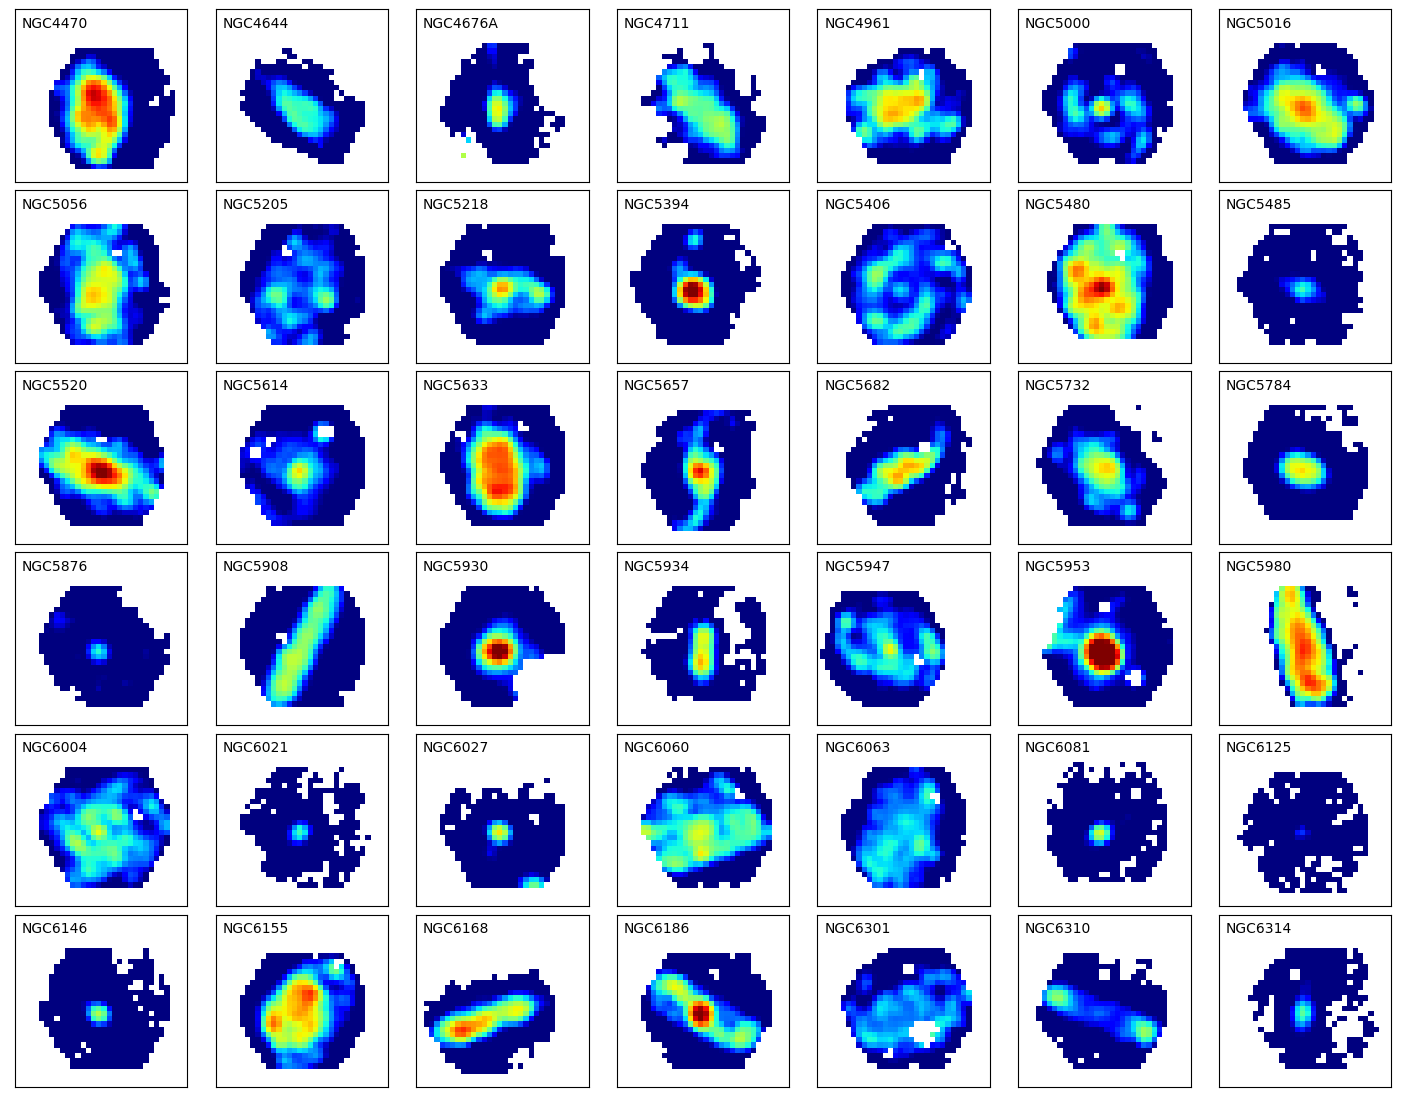

Plotting NGC6361 to UGC10710


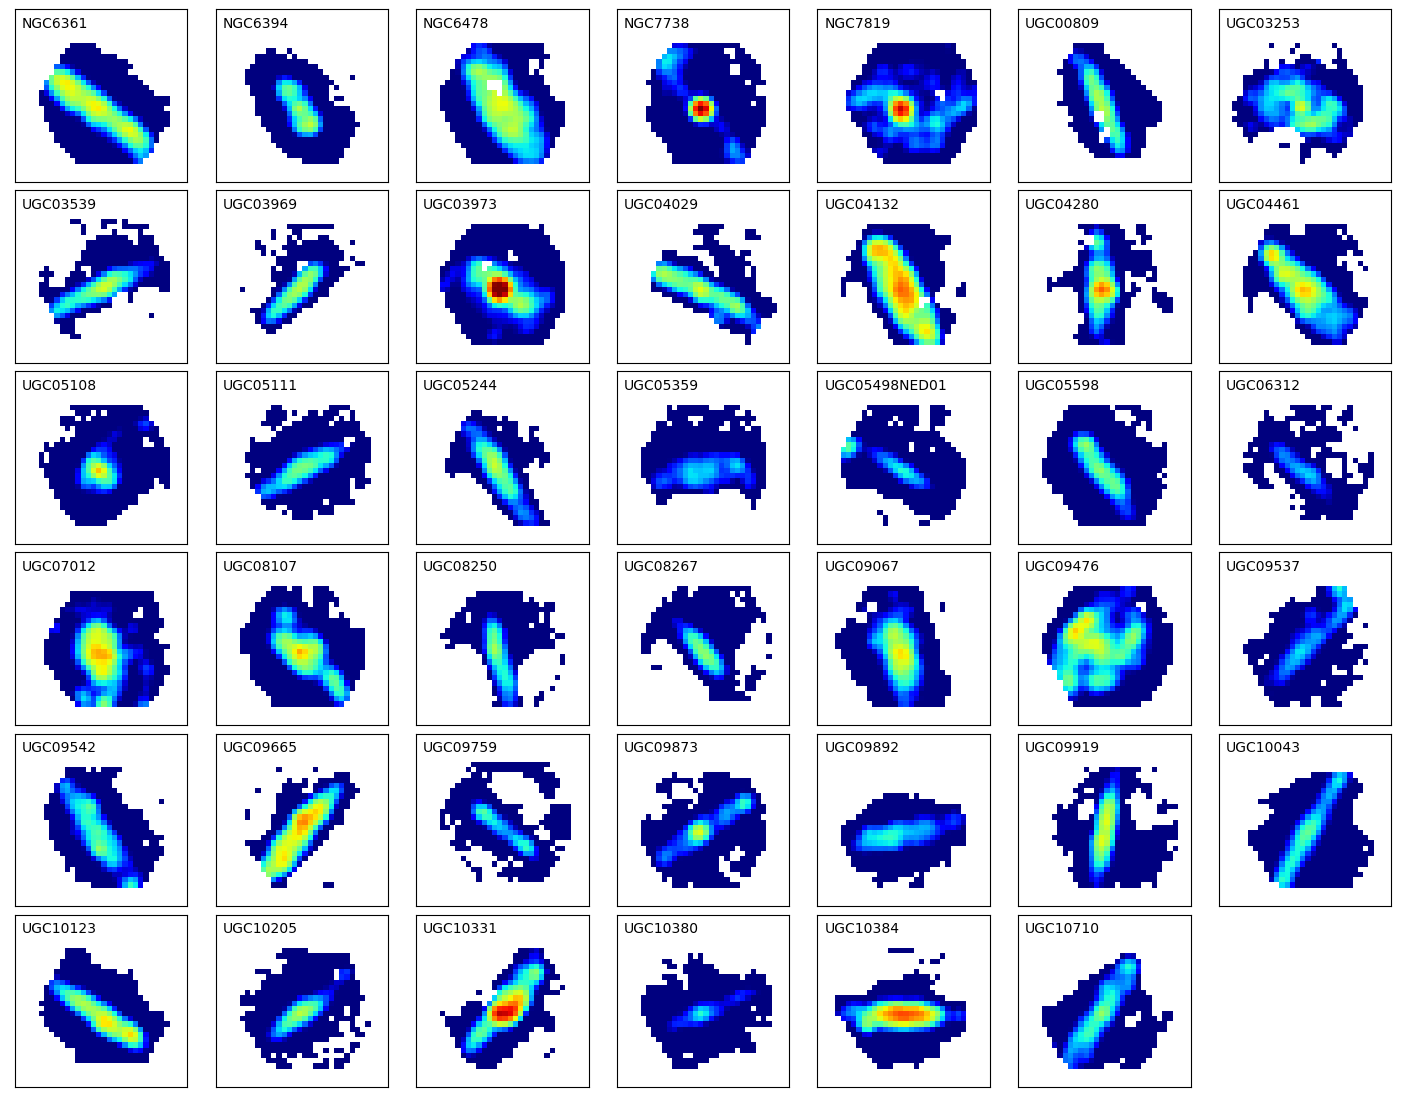

In [8]:
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='flux_sigsfr0_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=100))

## SFR map without extinction correction, SNR > 3 cut

Plotting column flux_sigsfr0_sm for 125 galaxies
Plotting ARP220 to NGC4211NED02


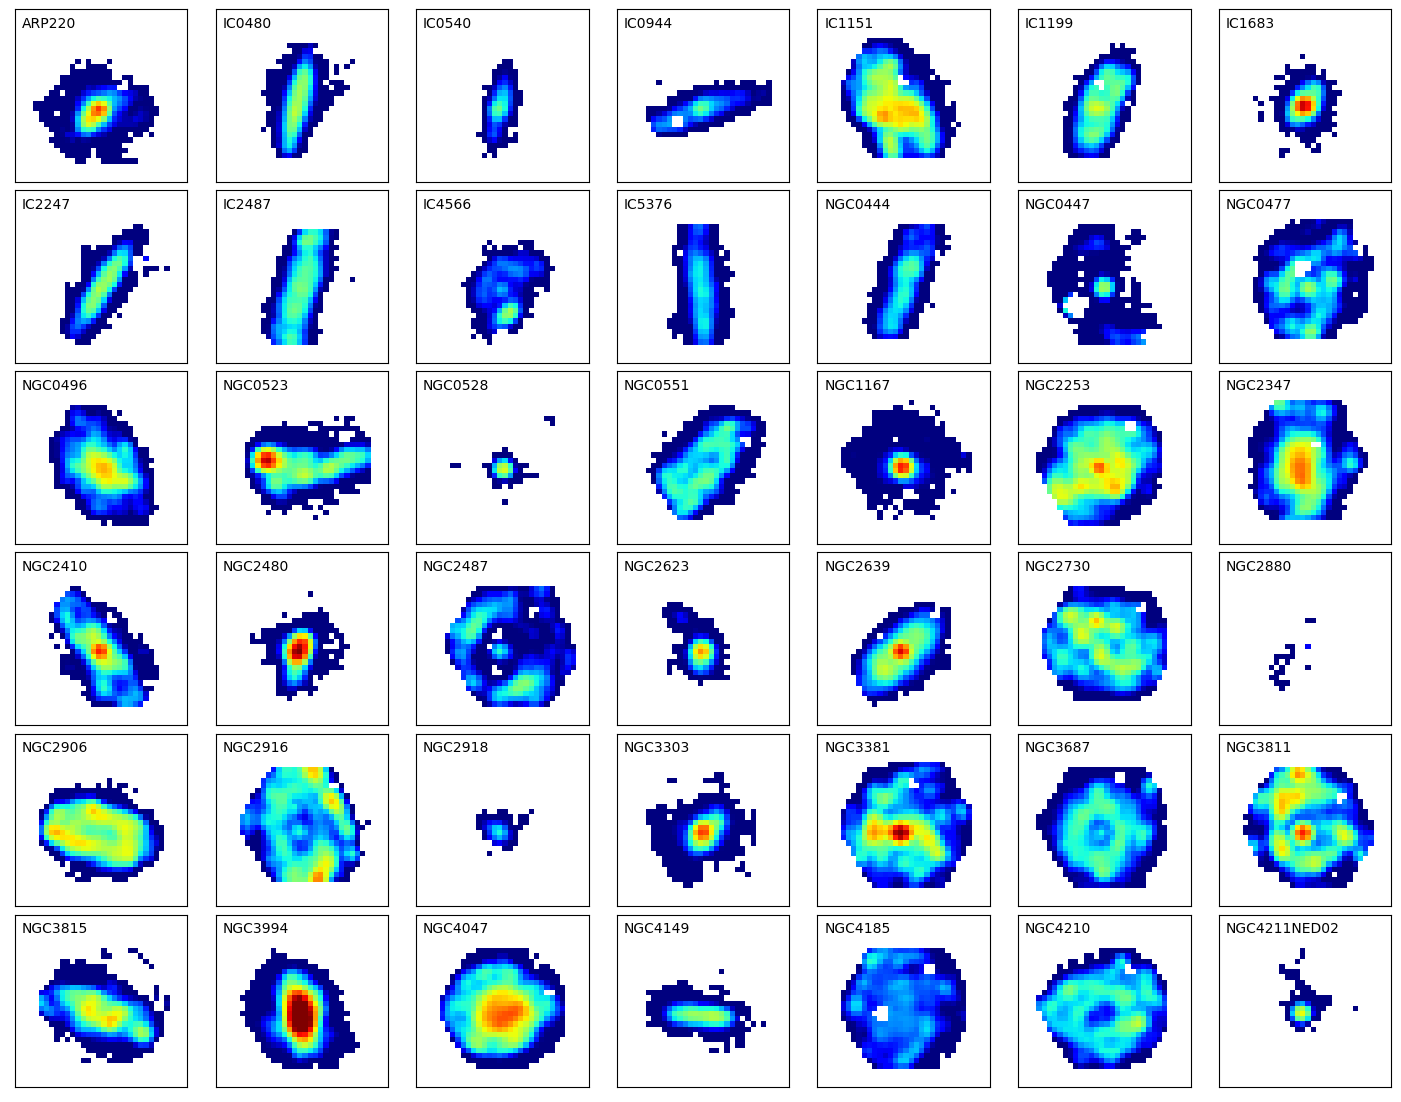

Plotting NGC4470 to NGC6314


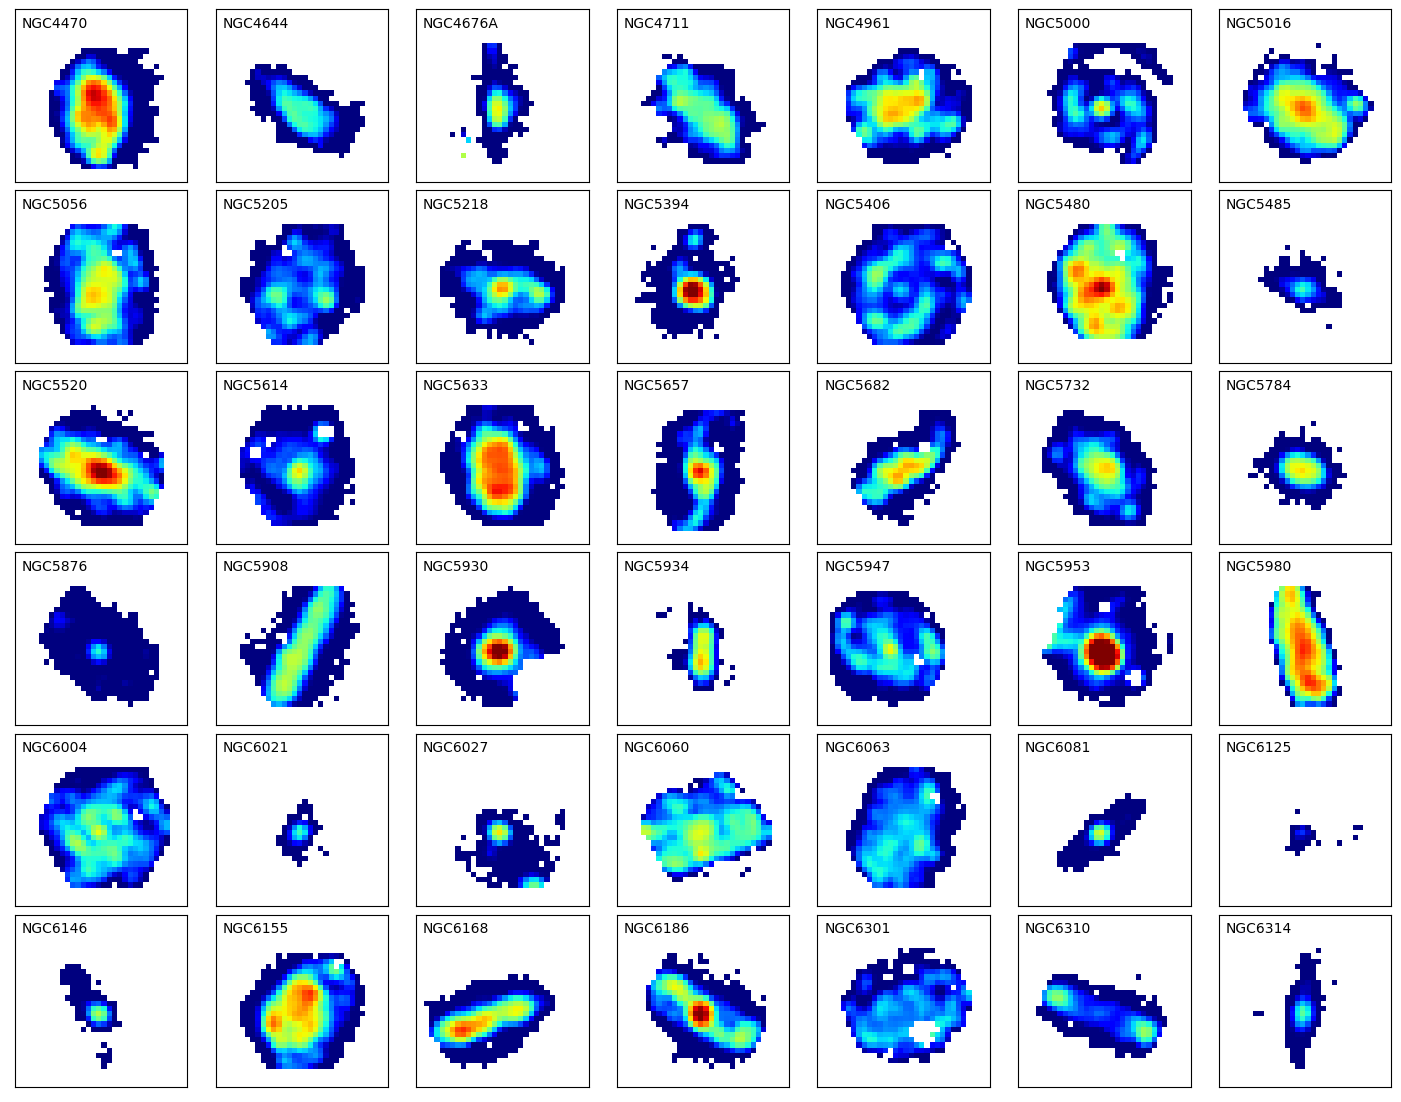

Plotting NGC6361 to UGC10710


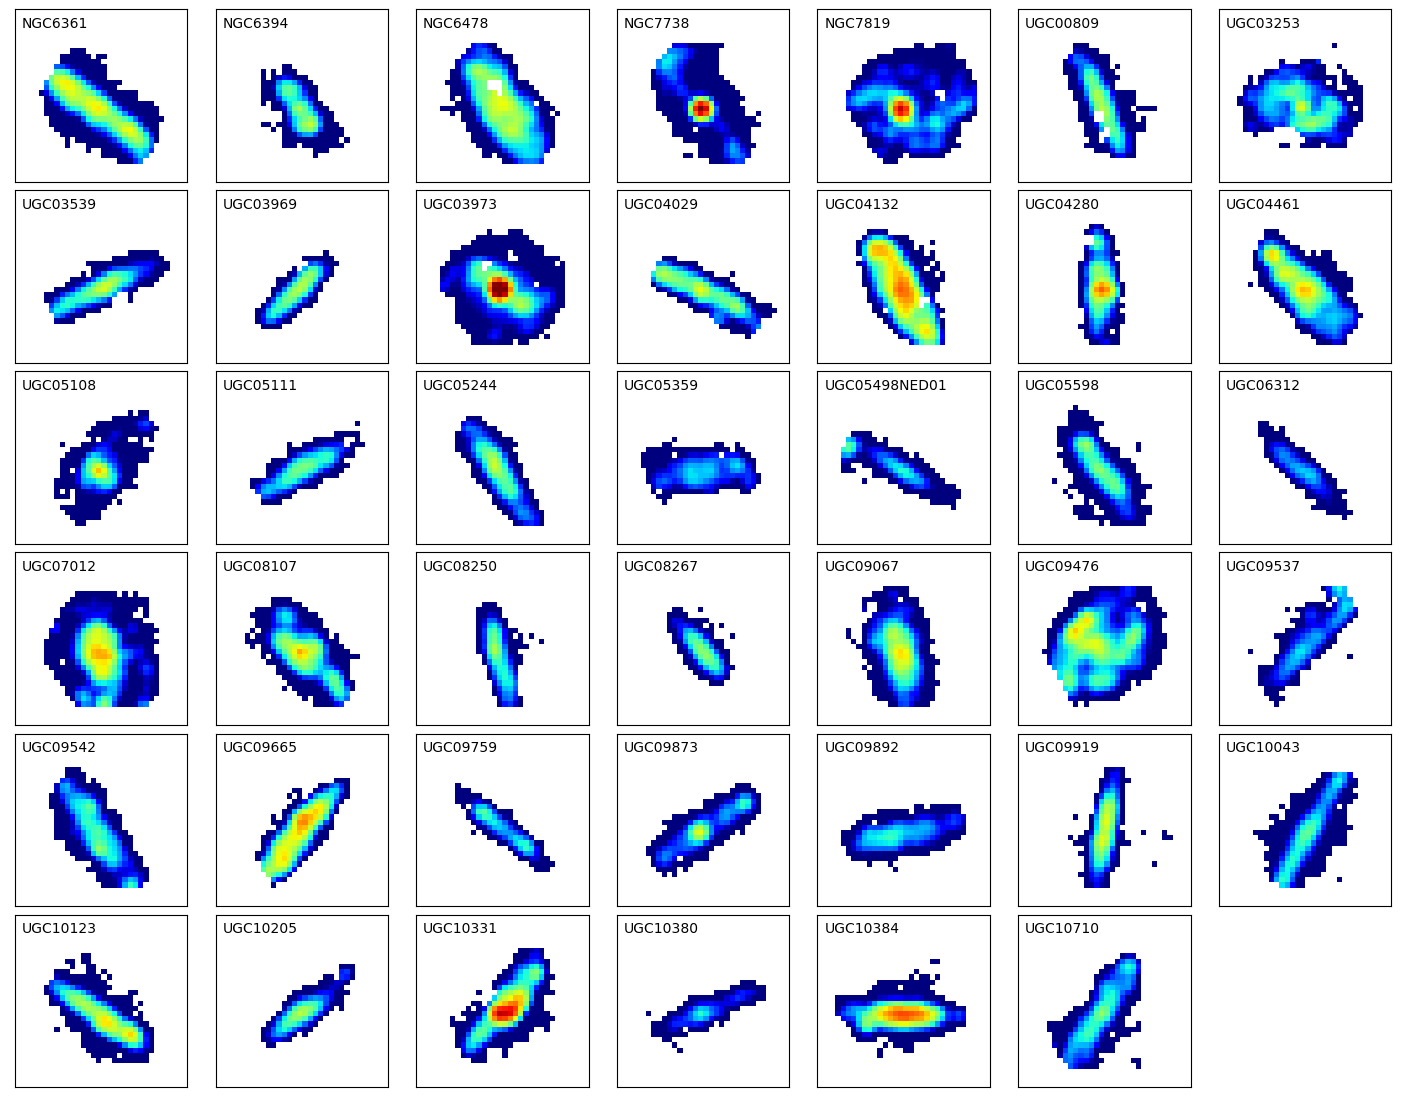

In [9]:
flag = (fluxtab['flux_sigsfr0_sm'] < 3*fluxtab['e_flux_sigsfr0_sm'])
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='flux_sigsfr0_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=100), blank=flag)

## Stellar surface density map without extinction correction

Plotting column sigstar_sm for 125 galaxies
Plotting ARP220 to NGC4211NED02


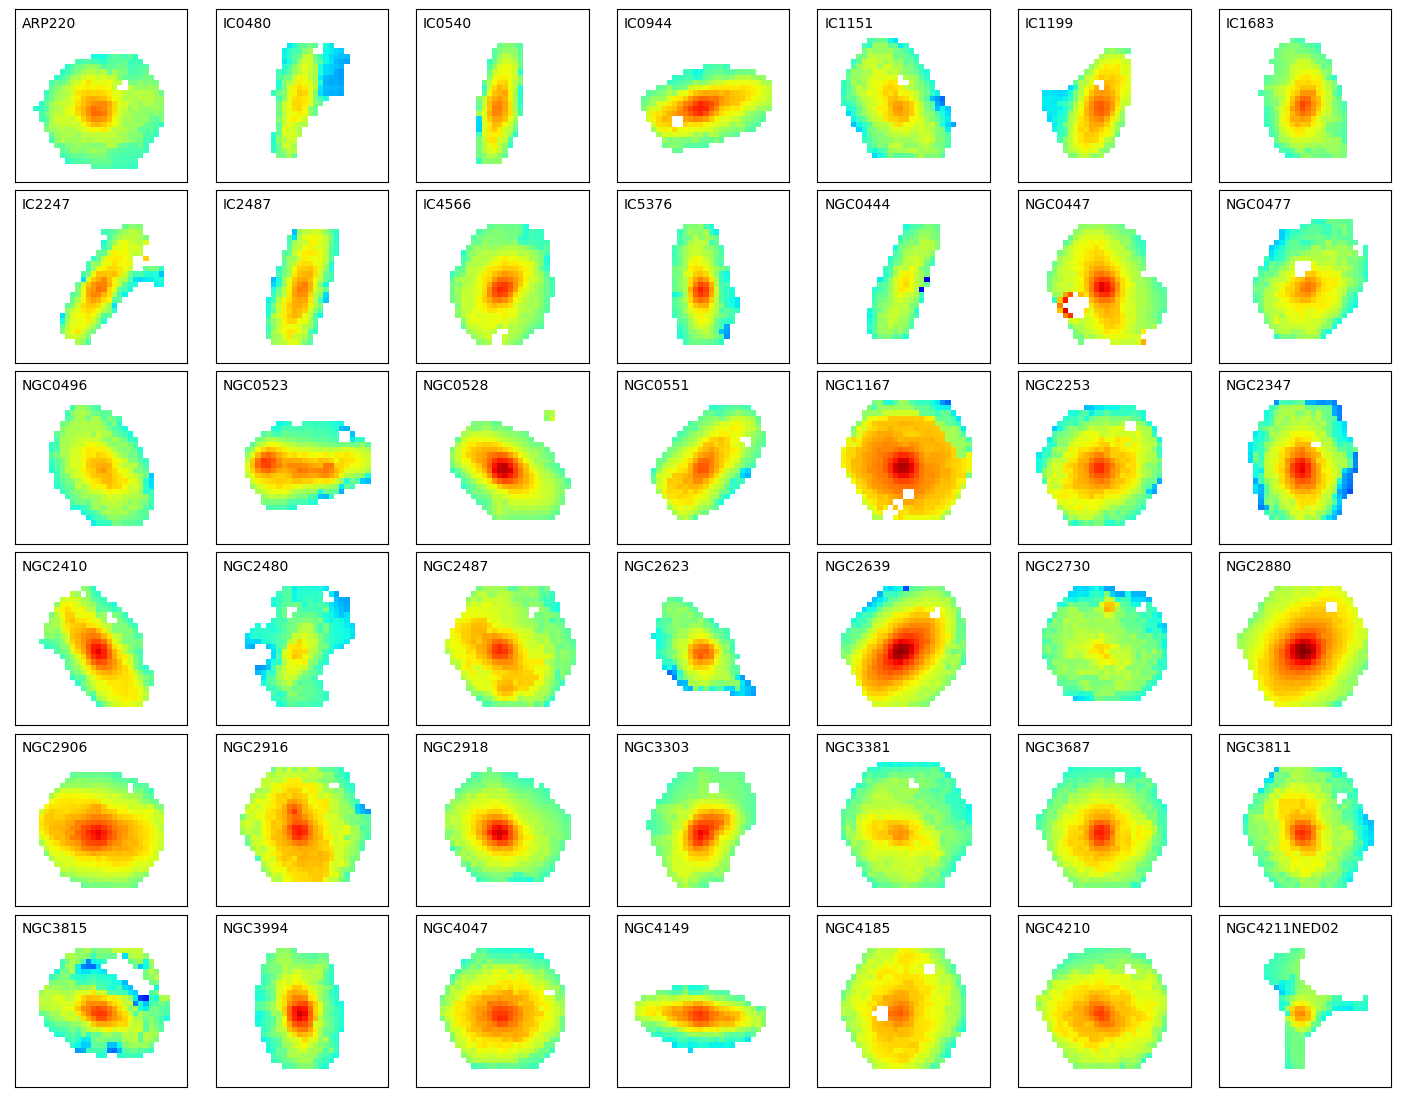

Plotting NGC4470 to NGC6314


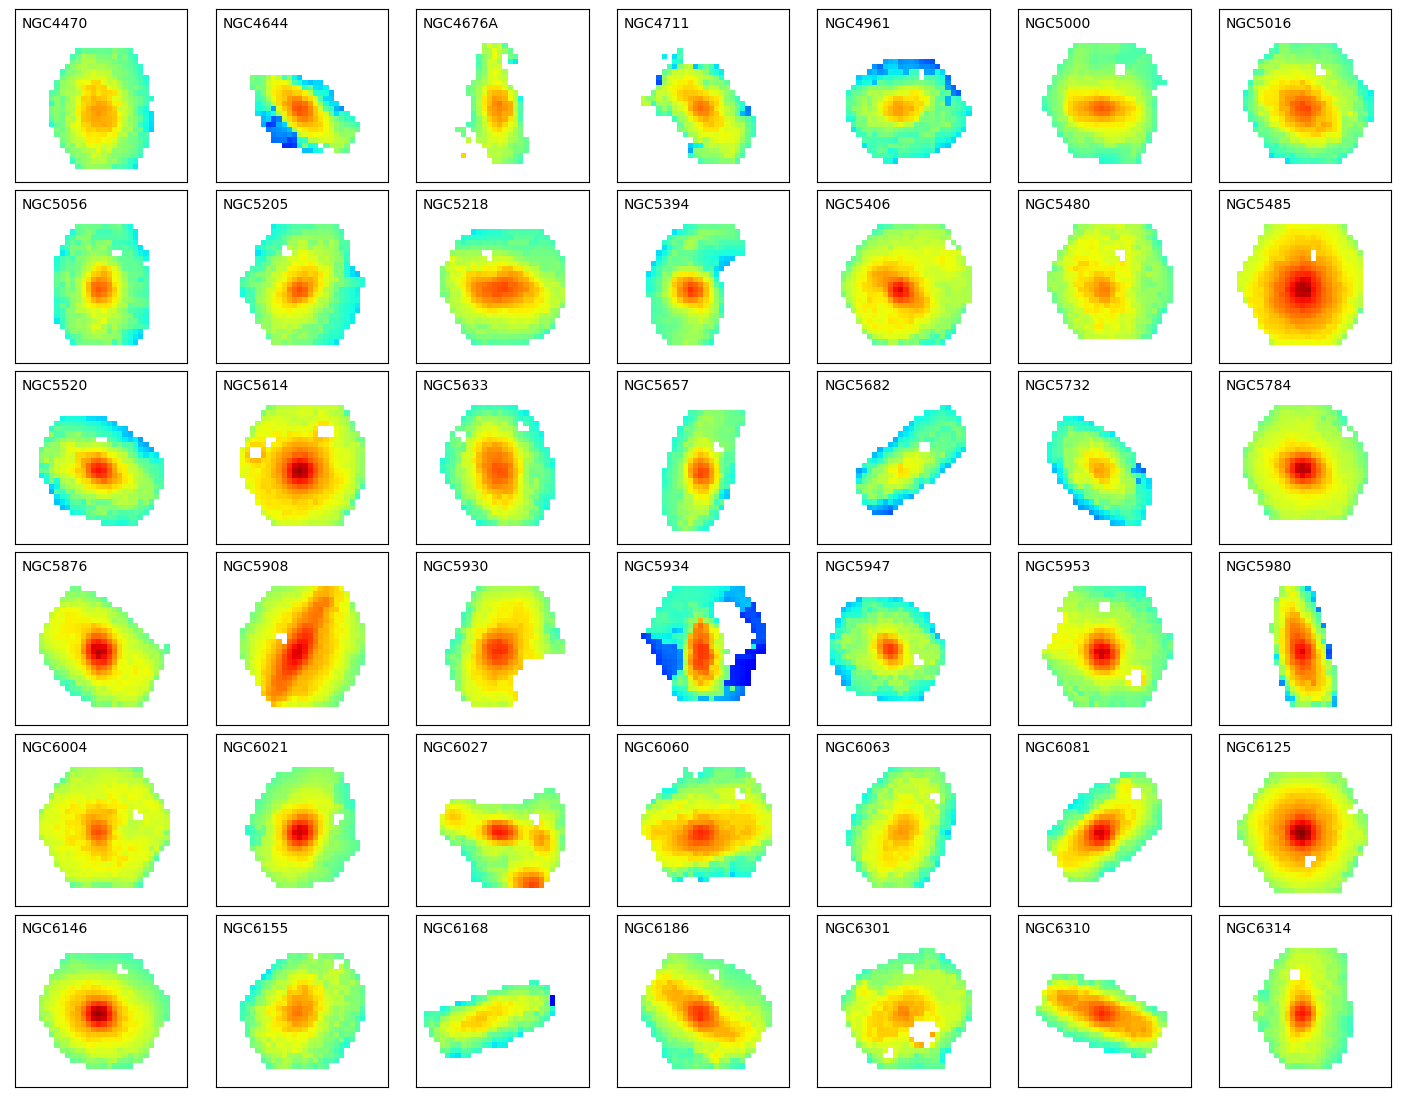

Plotting NGC6361 to UGC10710


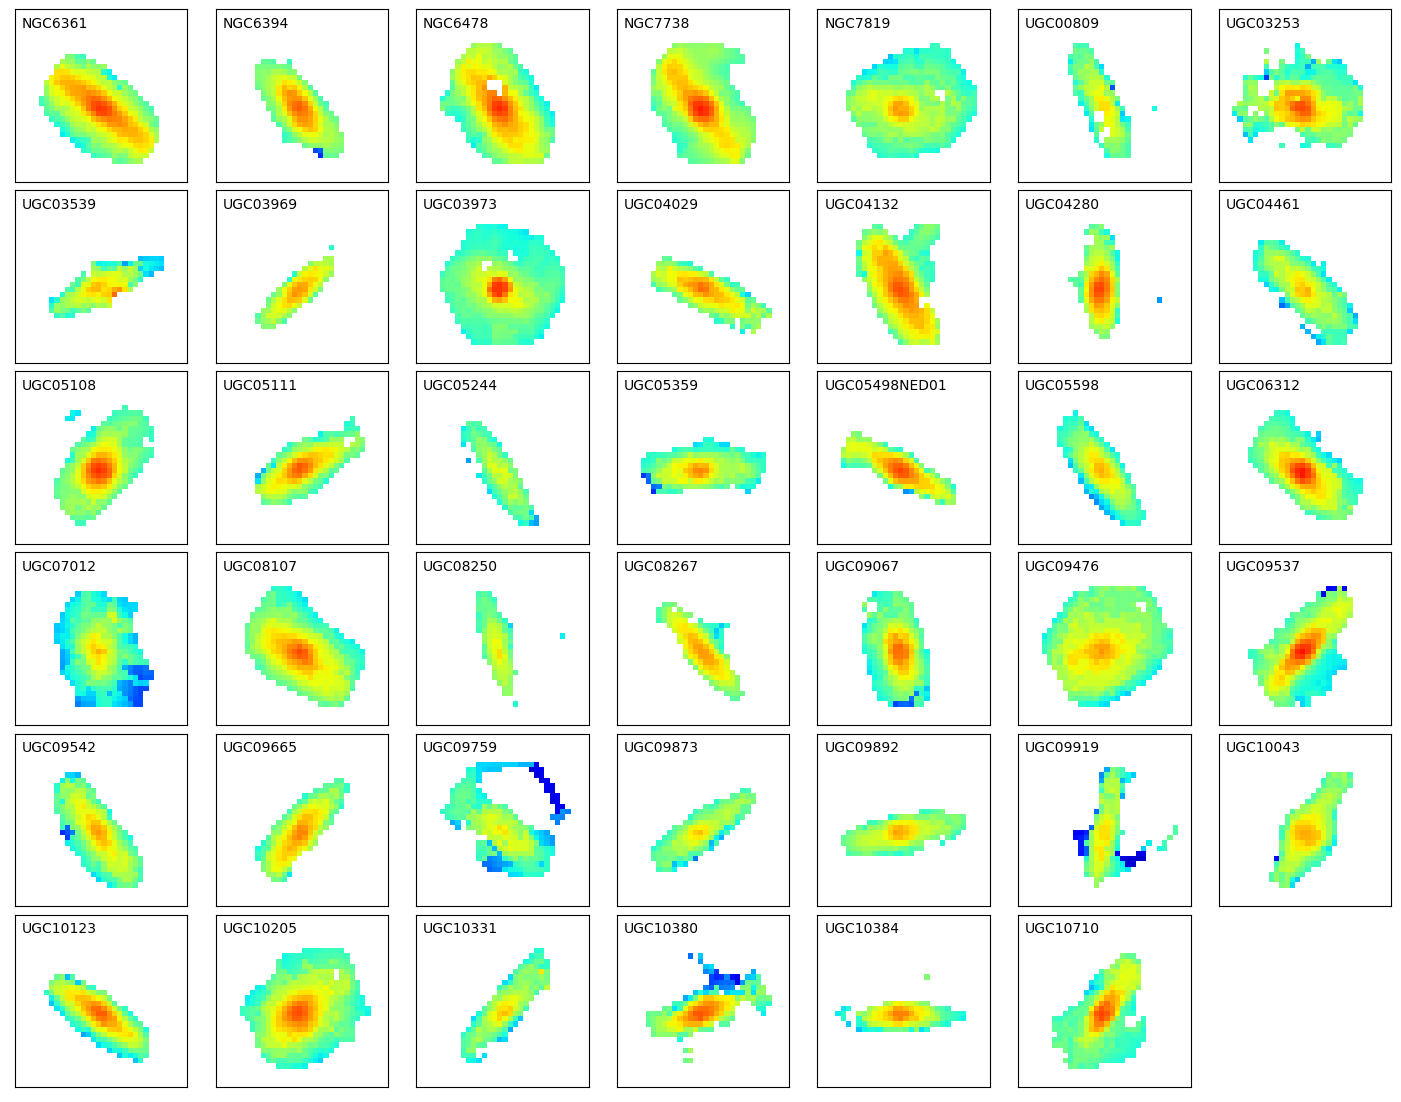

In [10]:
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='sigstar_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=0.1, vmax=10000))

## Specific SFR map

Plotting column specSFR for 125 galaxies
Plotting ARP220 to NGC4211NED02
ARP220 Default x limits used: [4, 38]
ARP220 Default y limits used: [4.0, 38.0]


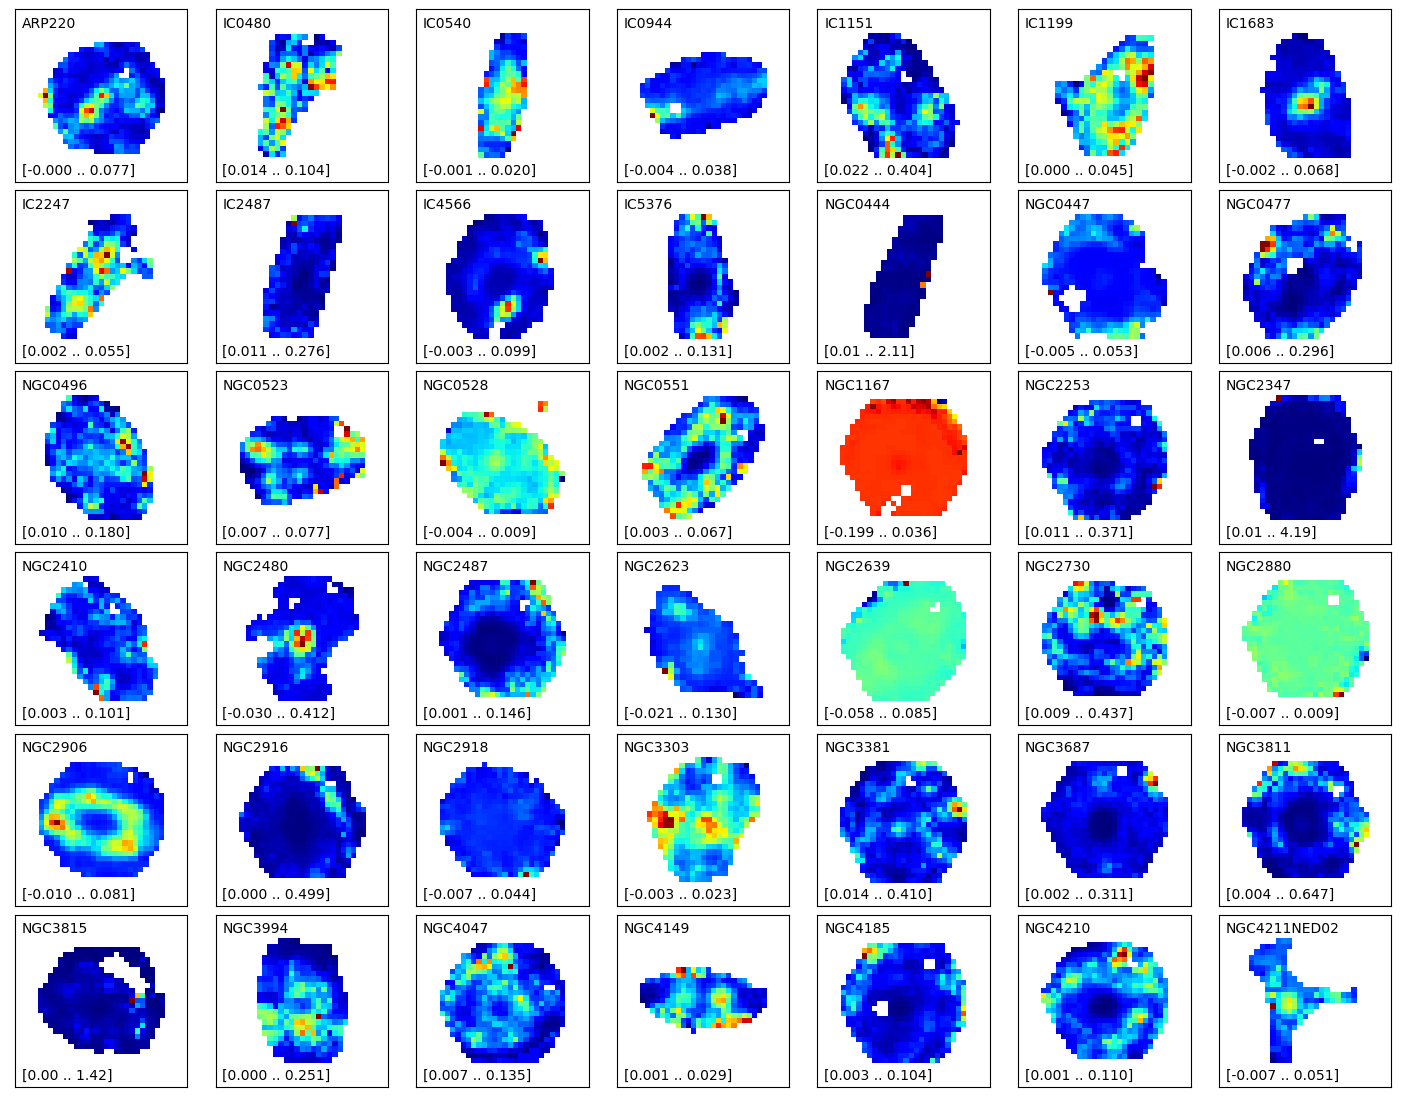

Plotting NGC4470 to NGC6314
NGC4470 Default x limits used: [6.0, 38.0]
NGC4470 Default y limits used: [5, 37]


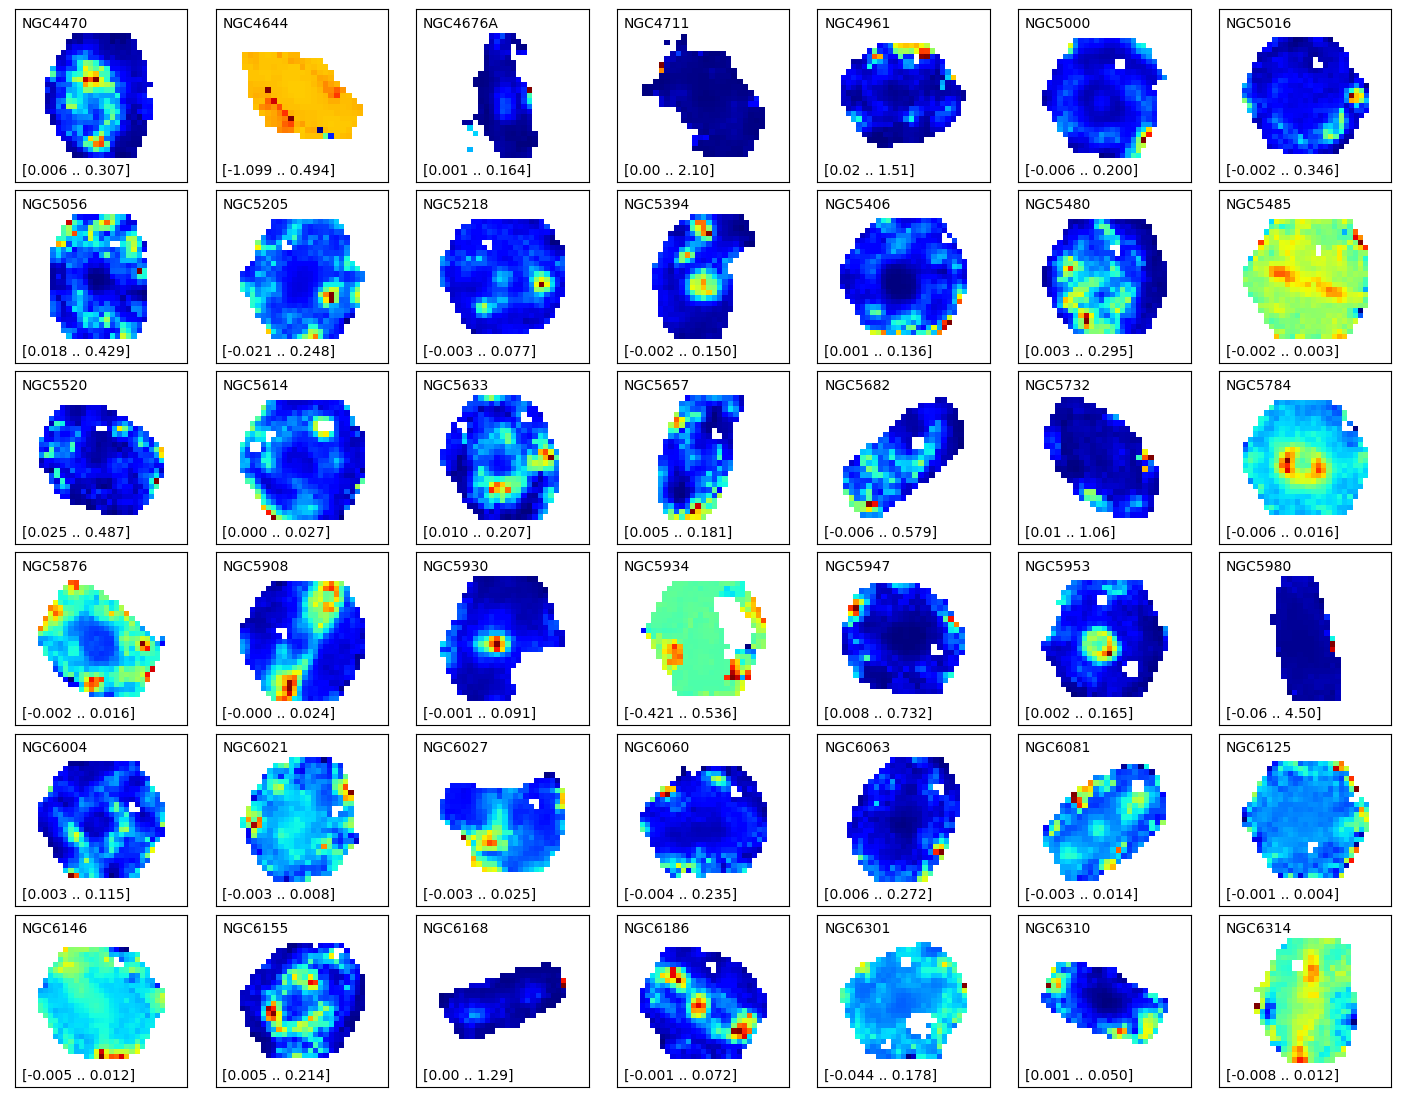

Plotting NGC6361 to UGC10710
NGC6361 Default x limits used: [5, 37]
NGC6361 Default y limits used: [5.0, 37.0]


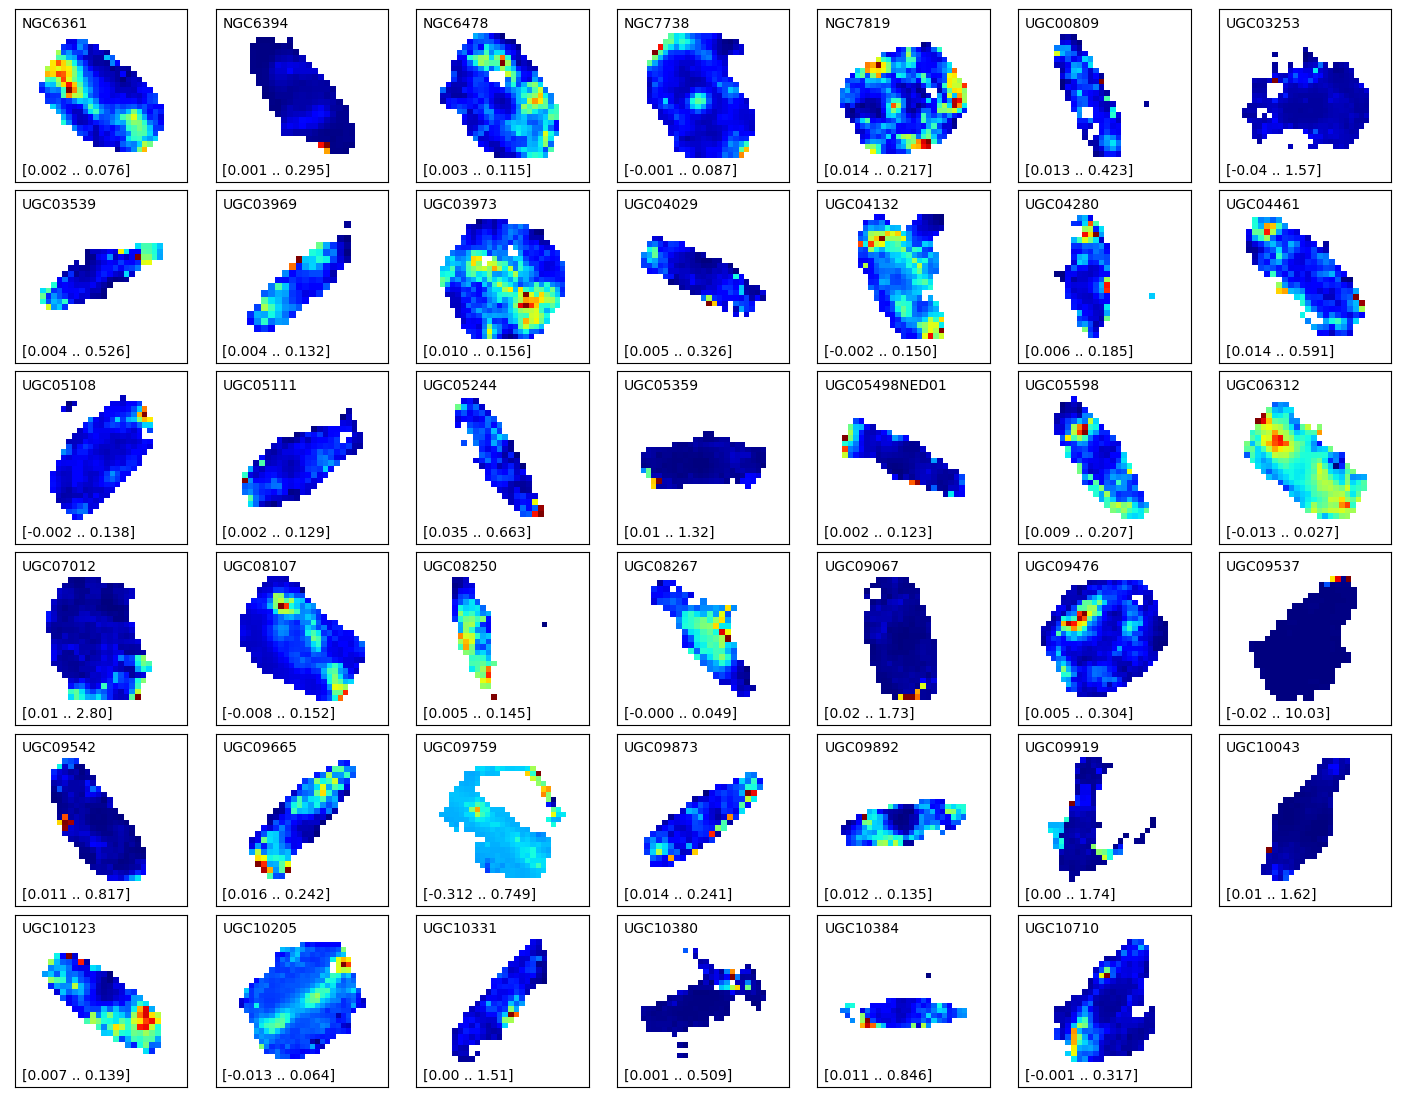

In [11]:
# vmin and vmax in Gyr^{-1}
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='specSFR', plotstyle='image', vshow=True)

## H$\alpha$ equivalent width map

Plotting column EW_Halpha_sm for 125 galaxies
Plotting ARP220 to NGC4211NED02
ARP220 Default x limits used: [4, 38]
ARP220 Default y limits used: [4.0, 38.0]


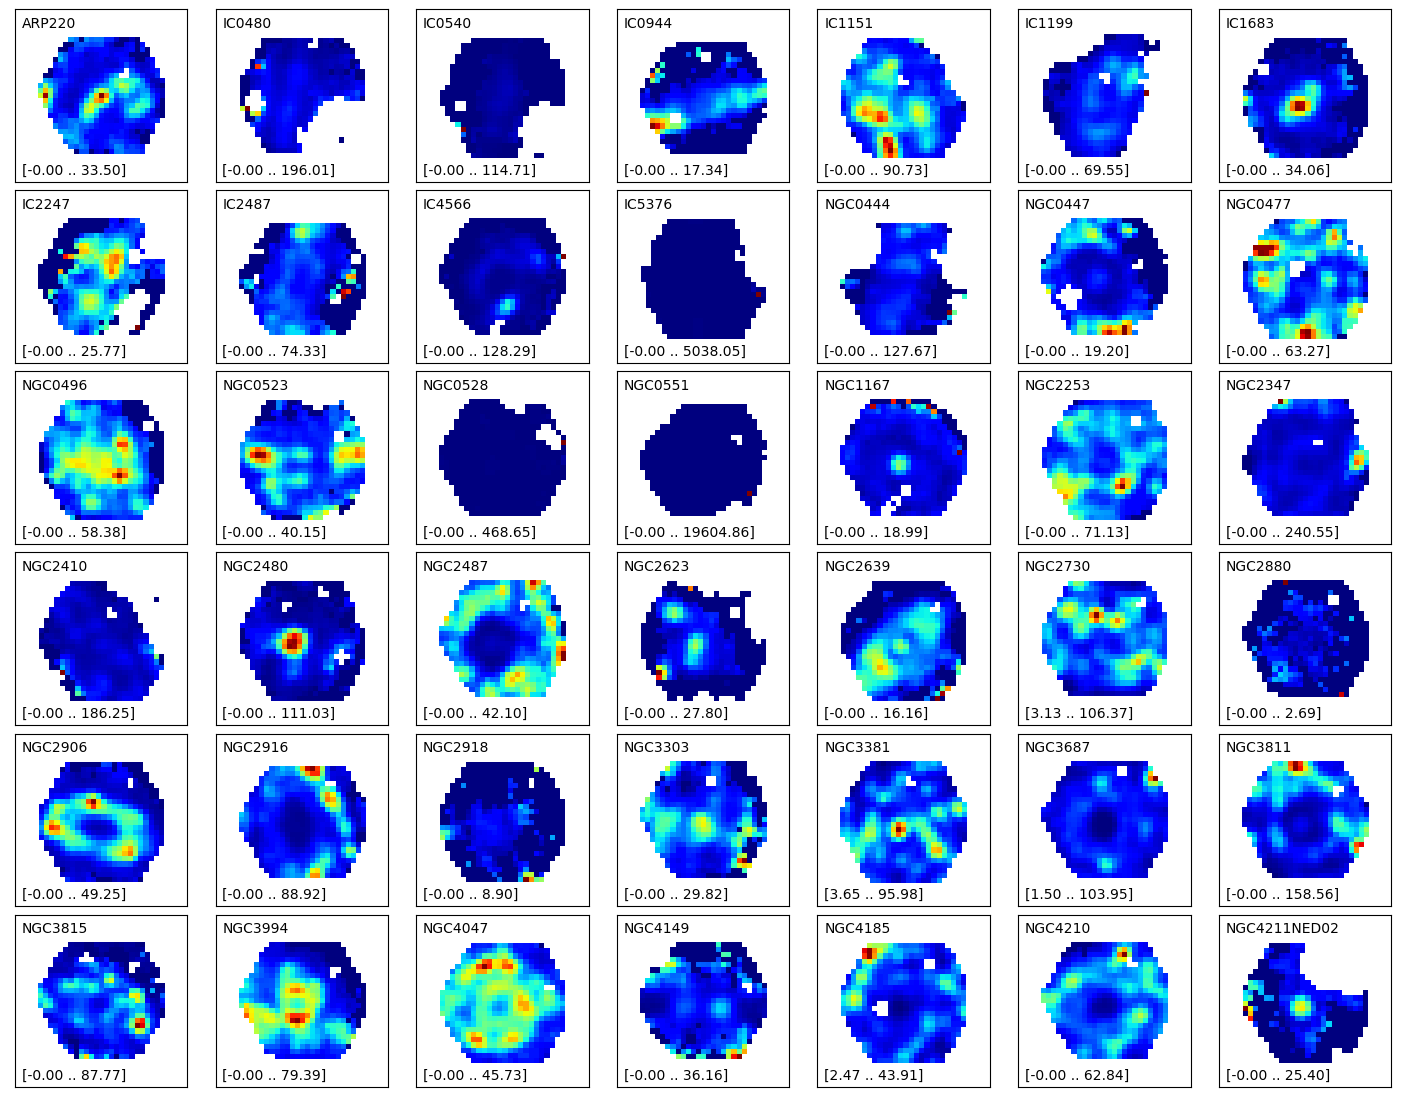

Plotting NGC4470 to NGC6314
NGC4470 Default x limits used: [7, 40]
NGC4470 Default y limits used: [5.0, 38.0]


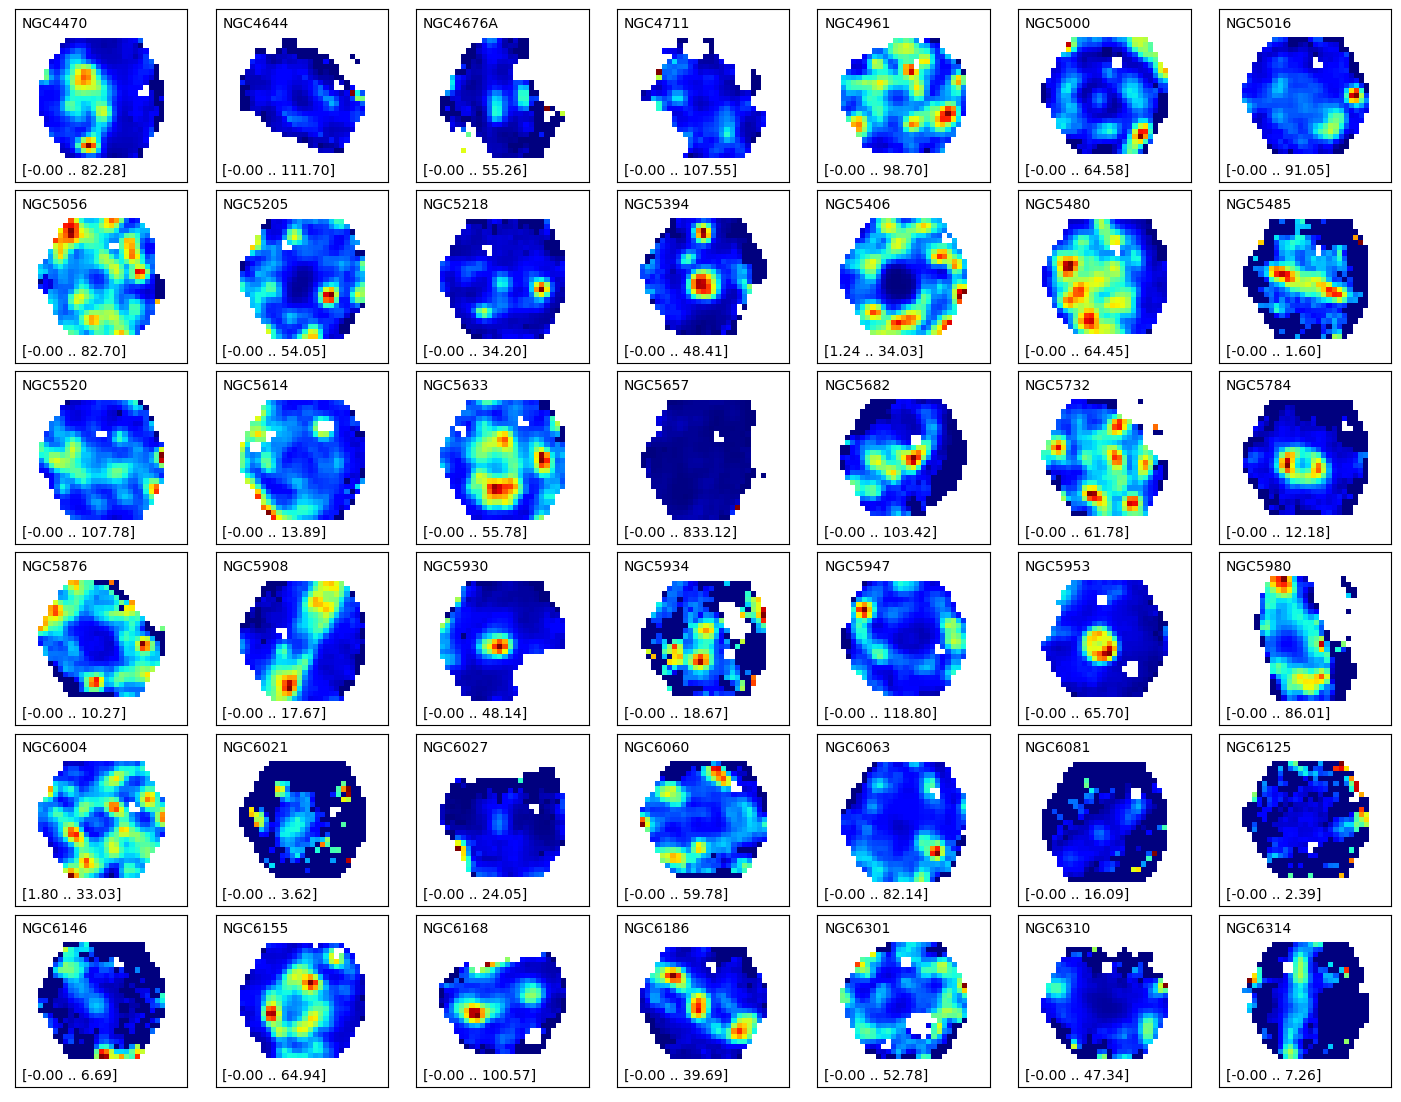

Plotting NGC6361 to UGC10710
NGC6361 Default x limits used: [5, 39]
NGC6361 Default y limits used: [5.0, 39.0]


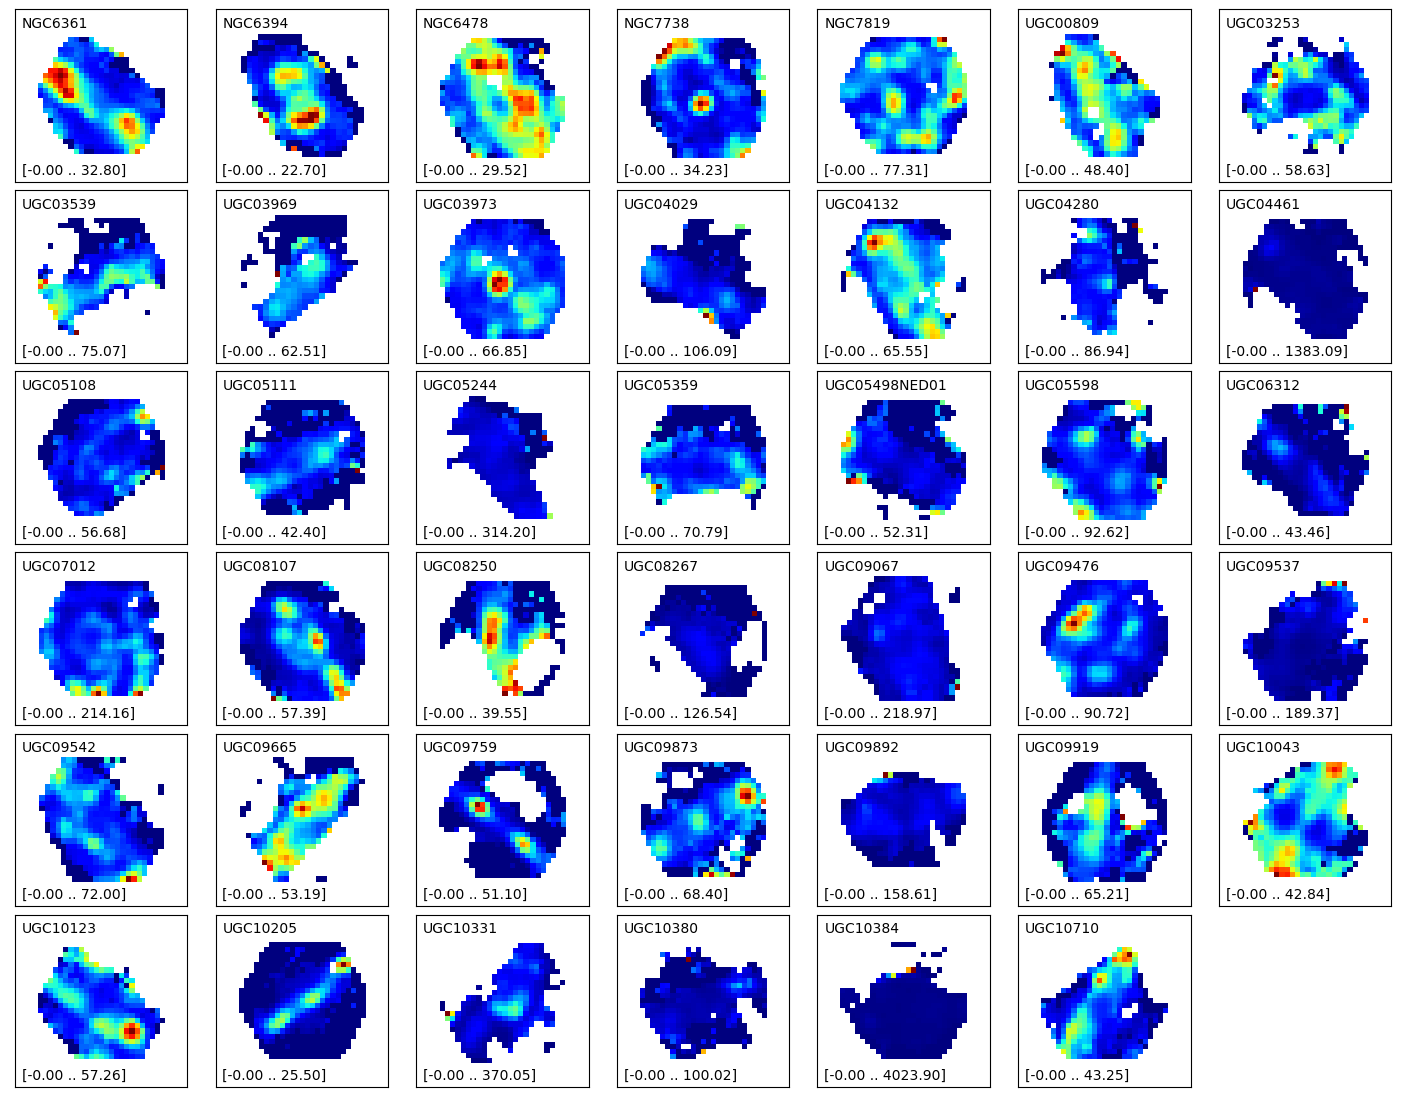

In [12]:
# vmin and vmax in Angstrom
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='EW_Halpha_sm', plotstyle='image', vshow=True)